In [1]:
import os
import json
import torch
import pickle as pkl
from PIL import Image
import scipy.io as IO
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torchvision.transforms as T

In [30]:
with open('predictions.pkl', 'rb') as fp:
    preds = pkl.load(fp)

with open('hico_20160224_det/coco_class_indices.json', 'r') as fp:
    coco_indices = json.load(fp=fp)

coco_indices = {index: label for label, index in coco_indices.items()}

In [31]:
image_path, probs, labels, bboxes, augmented_size, _ = preds[7]

In [33]:
bboxes * torch.tensor([2,2,2,2])

tensor([[4.6527e+00, 1.0121e+03, 7.6142e+02, 1.5861e+03],
        [2.0993e+00, 3.7783e+00, 2.2105e+03, 1.5824e+03]])

(640, 480)
tensor([ 800, 1066])


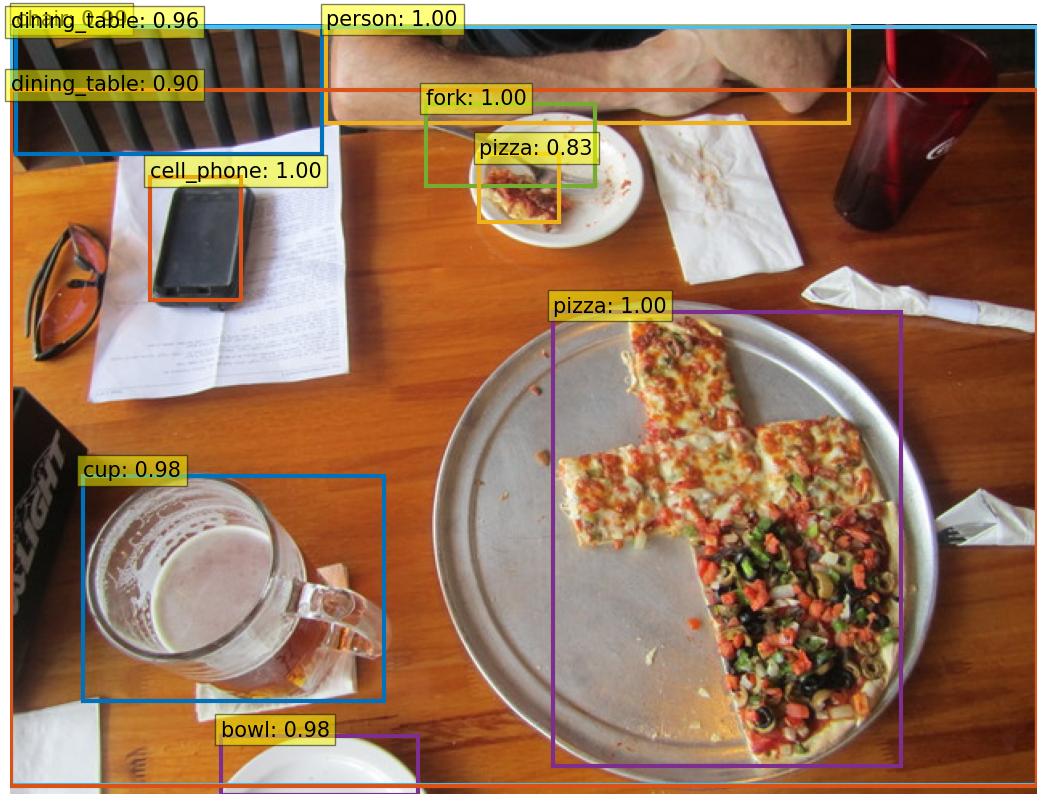

In [37]:
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def plot_results(img_path, prob, labels, boxes, augmented_size):
    pil_img = Image.open(img_path)
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    print(pil_img.size)
    print(augmented_size)
    w, h = pil_img.size
    ah, aw = augmented_size
    boxes = boxes * torch.tensor([w, h, w, h]) / torch.tensor([aw, ah, aw, ah])
    ax = plt.gca()
    for p, (xmin, ymin, xmax, ymax), l, c, in zip(prob, boxes.tolist(), labels, COLORS * 100):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))

        text = f'{coco_indices[l.item()]}: {p:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

image_path, probs, labels, bboxes, augmented_size, _ = preds[6]
plot_results(image_path[0], probs, labels, bboxes, augmented_size)

In [27]:
bboxes

tensor([[2.3264e+00, 5.0604e+02, 3.8071e+02, 7.9305e+02],
        [1.0497e+00, 1.8891e+00, 1.1053e+03, 7.9119e+02]])

In [47]:
torch.nonzero(torch.tensor([False, True, True, False, False]))

tensor([[1],
        [2]])

In [43]:
torch.nonzero(torch.tensor([[[0.6, 0.0, 0.7, 0.0],
                             [0.0, 0.4, 0.0, 0.0],
                             [0.0, 0.0, 1.2, 0.0],
                             [0.0, 1.0, 0.0,-0.4]]]))

tensor([[0, 0, 0],
        [0, 0, 2],
        [0, 1, 1],
        [0, 2, 2],
        [0, 3, 1],
        [0, 3, 3]])